In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\91965\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = df[df['job_title_short'] == 'Data Analyst'].copy()

In [14]:
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
median_salary=('salary_year_avg', 'median'), 
skill_count = ('job_skills', 'count'))

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

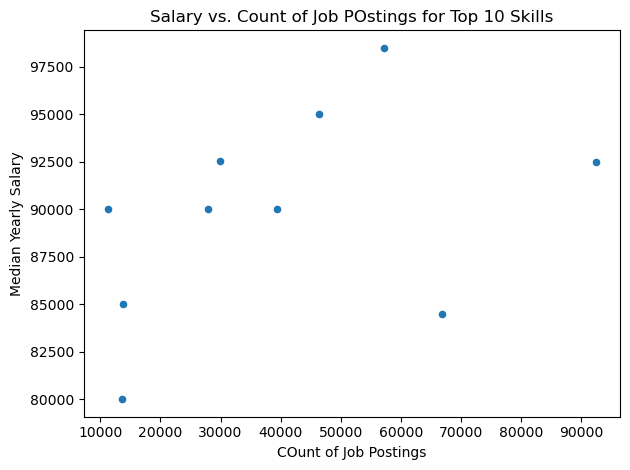

In [15]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('COunt of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job POstings for Top 10 Skills')
plt.tight_layout()
plt.show()

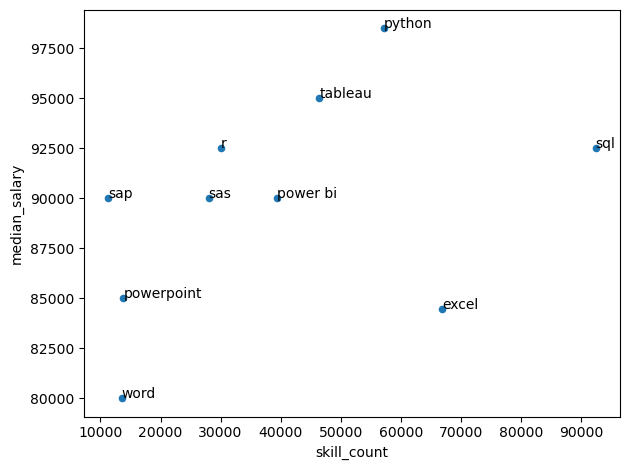

In [17]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.tight_layout()